 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col = 'Date', parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp_path = Path("Resources/sp500_history.csv")
sp_df = pd.read_csv(sp_path, index_col='Date', parse_dates=True)
sp_df.head()

/var/folders/x9/ddkb4kxd1t5111kw04b1cp3w0000gn/T/ipykernel_58232/3650655959.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp_df = pd.read_csv(sp_path, index_col='Date', parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$','')
sp_df['Close'] = sp_df['Close'].astype('float')
sp_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
sp_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp_daily_returns = sp_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
sp_daily_returns = sp_daily_returns.dropna()
sp_daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns = sp_daily_returns.rename(columns={'Close':'SP_Daily_Returns'})
sp_daily_returns.head()

,SP_Daily_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_joined = pd.concat([whale_df, algo_df, sp_daily_returns], axis = 'columns', join = 'inner')
daily_returns_joined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

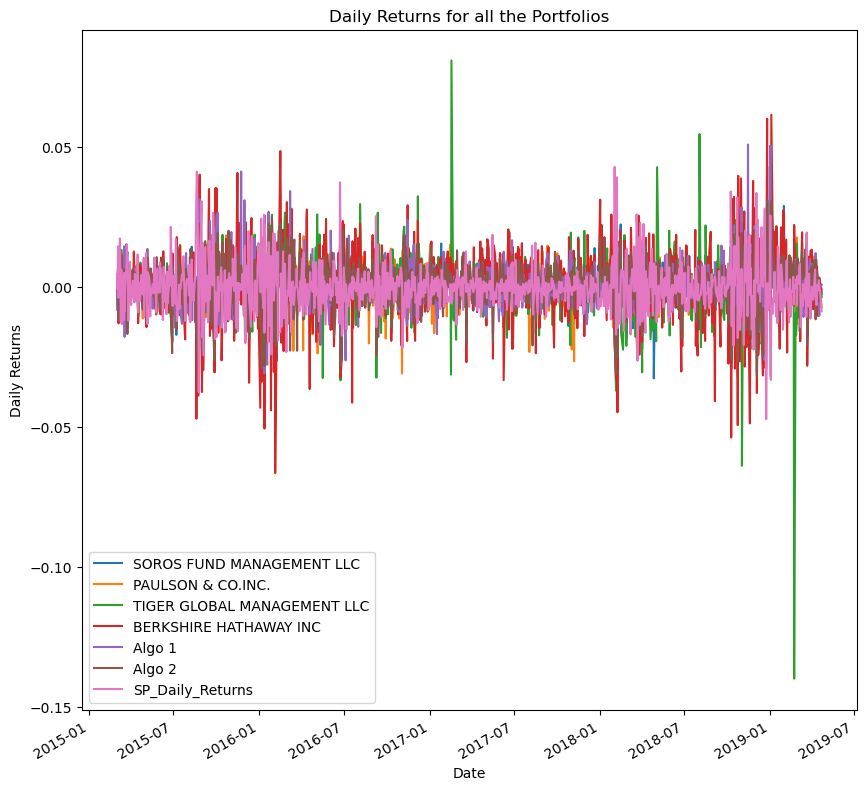

In [16]:
# Plot daily returns of all portfolios
daily_returns_joined.plot(figsize =(10,10), ylabel = "Daily Returns", title = "Daily Returns for all the Portfolios");

#### Calculate and Plot cumulative returns.

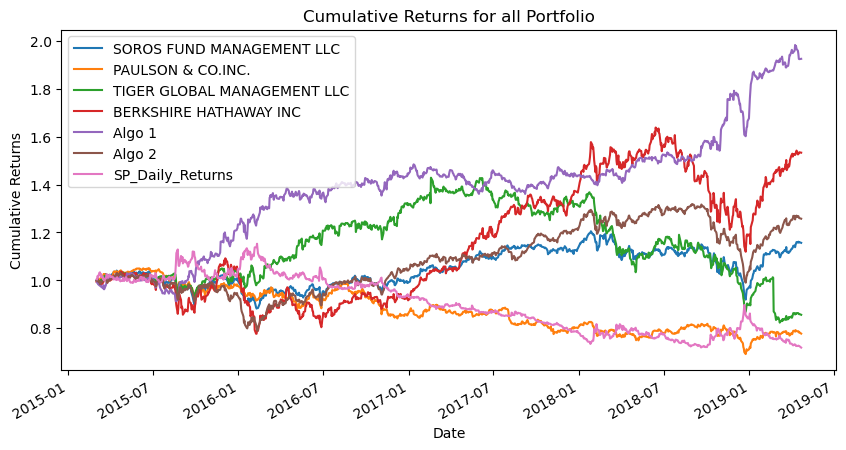

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all = (1 + daily_returns_joined).cumprod()

# Plot cumulative returns
cumulative_returns_all.plot(figsize = (10,5), ylabel = 'Cumulative Returns', title = 'Cumulative Returns for all Portfolio');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


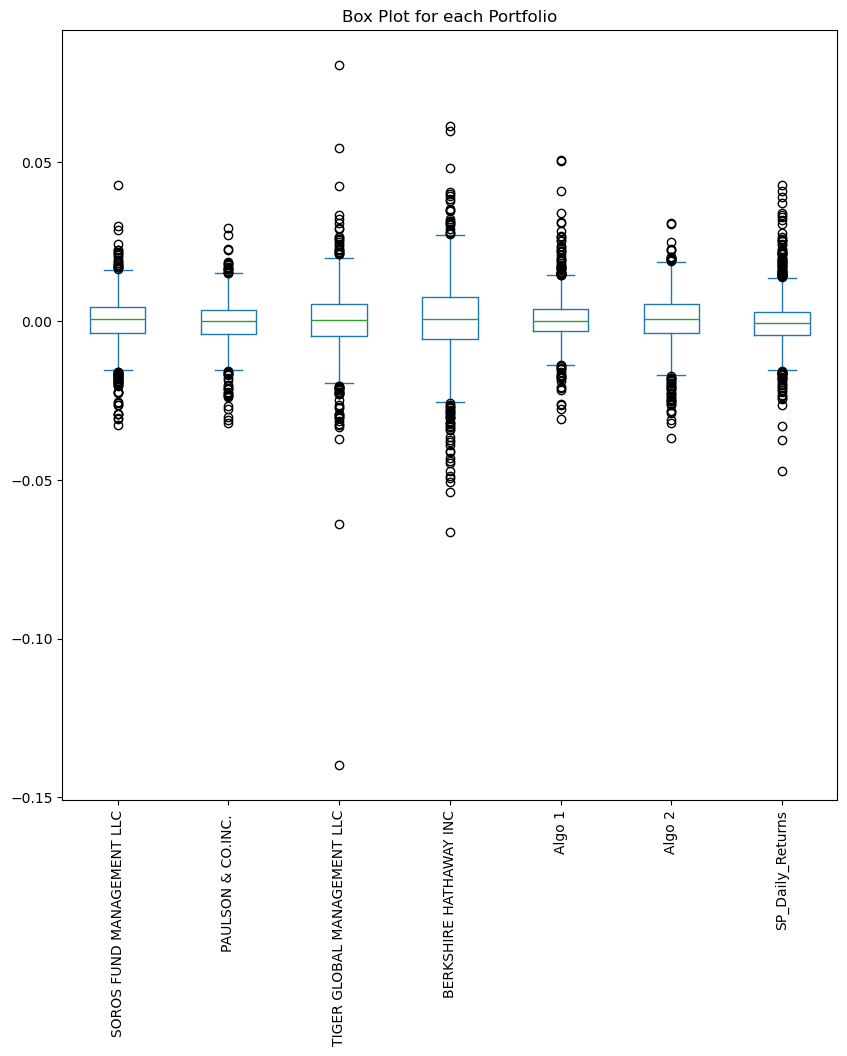

In [18]:
# Box plot to visually show risk
daily_returns_joined.plot.box(figsize = (10,10), rot=90, title= 'Box Plot for each Portfolio');

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std_joined = daily_returns_joined.std()
daily_std_joined

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP_Daily_Returns               0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp_std = sp_daily_returns.std()
sp_std
# Determine which portfolios are riskier than the S&P 500

print('These portfolios are riskier than the S&P 500: BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC')
daily_std_joined > daily_std_joined['SP_Daily_Returns']

These portfolios are riskier than the S&P 500: BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP_Daily_Returns               False
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_for_portfolios = daily_std_joined*np.sqrt(252)
annual_std_for_portfolios

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP_Daily_Returns               0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

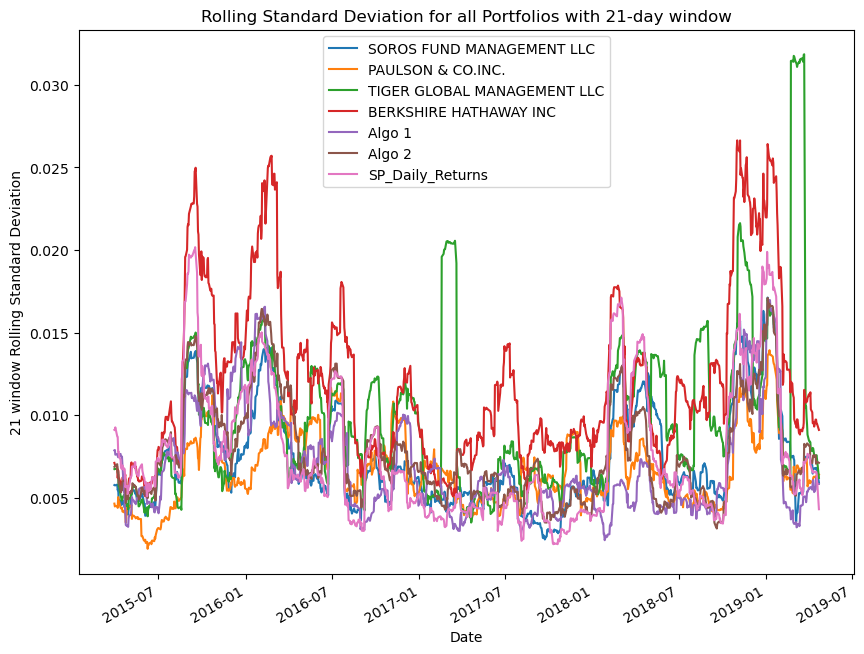

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_all_portfolios = daily_returns_joined.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_all_portfolios.plot(figsize=(10,8), ylabel='21 window Rolling Standard Deviation', title = 'Rolling Standard Deviation for all Portfolios with 21-day window');

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Daily_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP_Daily_Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


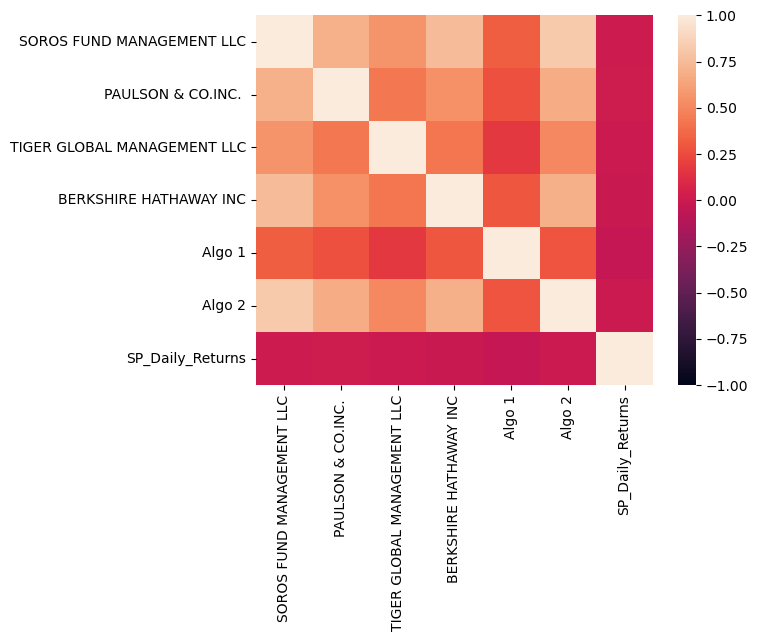

In [23]:
# Calculate the correlation
daily_returns_correlated = daily_returns_joined.corr()
# Display de correlation matrix
sns.heatmap(daily_returns_correlated, vmin = -1, vmax = 1)
daily_returns_correlated

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
print(daily_returns_joined.columns)

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_Daily_Returns'],
      dtype='object')


Alga1 covariance: -2.2230425517155116e-06
S&P500 variance: 7.373467552840441e-05
Alga1 computed beta: -0.03014921454233756


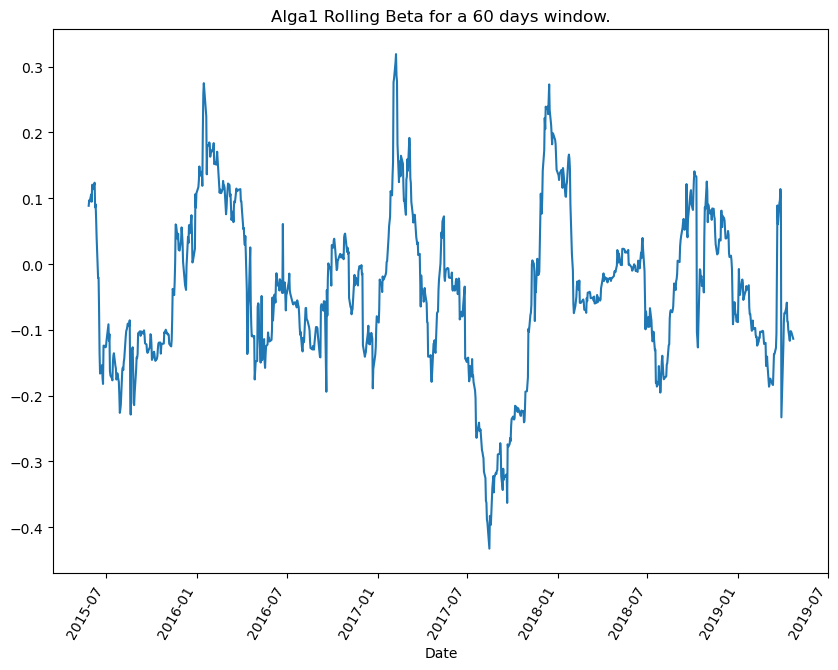

In [25]:
# Calculate covariance of a single portfolio
covariance_algo1 = daily_returns_joined['Algo 1'].cov(daily_returns_joined['SP_Daily_Returns'])
print(f'Alga1 covariance: {covariance_algo1}')
# Calculate variance of S&P 500
sp_variance = daily_returns_joined['SP_Daily_Returns'].var()
print(f'S&P500 variance: {sp_variance}')
# Computing beta
Algo1_beta = covariance_algo1/sp_variance
print(f'Alga1 computed beta: {Algo1_beta}')
# Plot beta trend
rolling_covariance = daily_returns_joined['Algo 1'].rolling(window = 60).cov(daily_returns_joined['SP_Daily_Returns'])
rolling_variance = daily_returns_joined['SP_Daily_Returns'].rolling(window=60).var()
Alga1_rolling = rolling_covariance/rolling_variance
Alga1_rolling.plot(figsize=(10,8), rot = 60, title = 'Alga1 Rolling Beta for a 60 days window.');


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
daily_returns_joined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


------------------------------ Calculated EMA with a 21-day half-life for standard deviation ----------------------------


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Daily_Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


---------------------------------------- Calculated Rolling window using EMA ---------------------------------------------


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Daily_Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


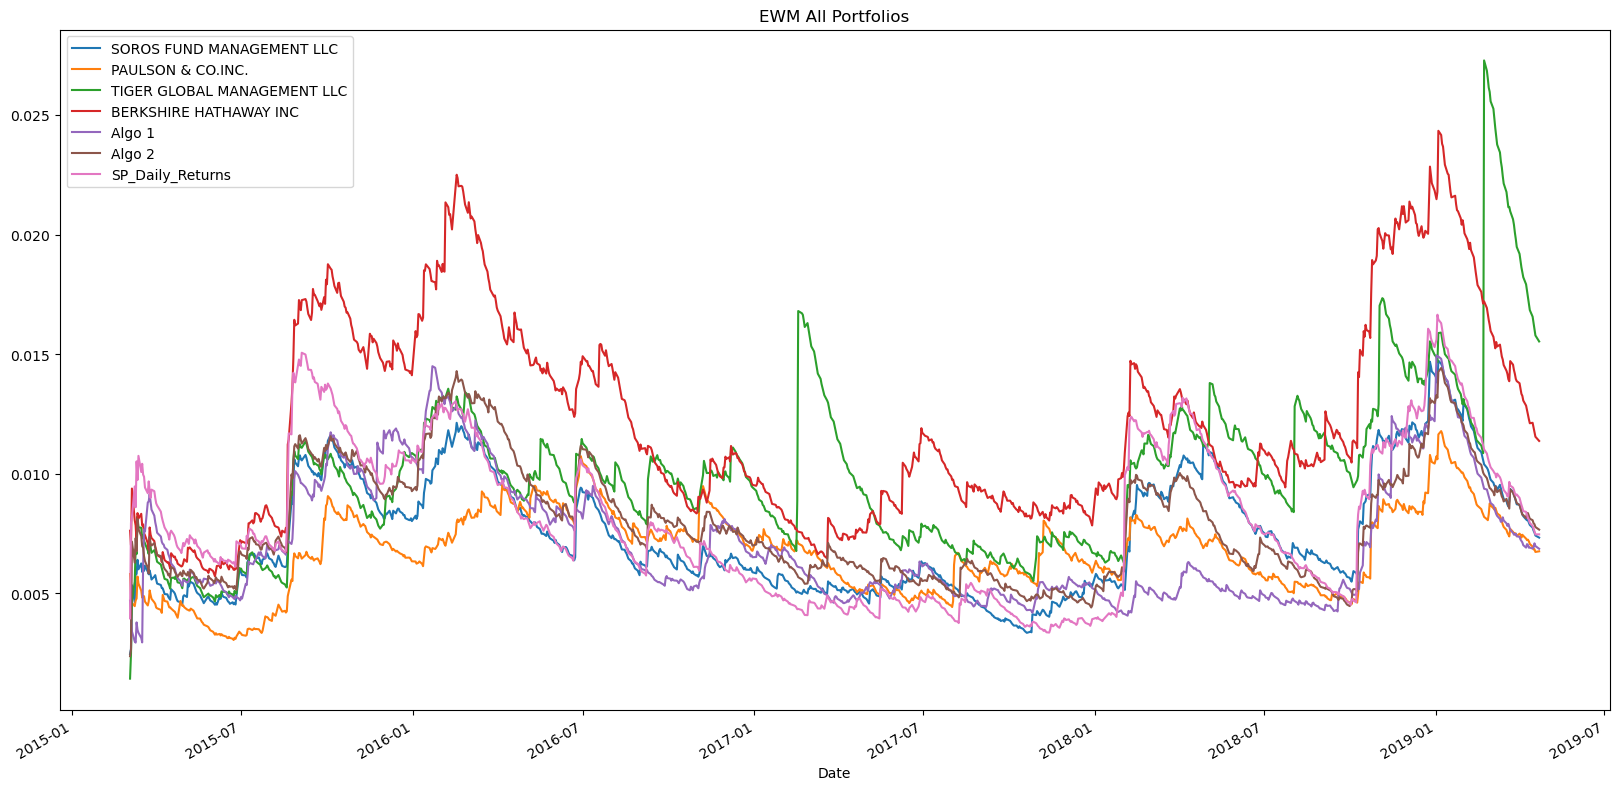

In [27]:
# Use `ewm` to calculate the rolling window
#Calculate EMA with a 21-day half-life for standard deviation
daily_returns_ema = daily_returns_joined.ewm(halflife=21).std()
print('-'*30,'Calculated EMA with a 21-day half-life for standard deviation','-'*28)
display(daily_returns_ema.head())

#Calculate rolling window using EMA
rolling_ema = daily_returns_joined.ewm(halflife=21).std()  
rolling_ema_df = pd.DataFrame(rolling_ema)
print('-'*40,'Calculated Rolling window using EMA','-'*45)
display(rolling_ema_df.head())
# Plot the data
daily_returns_joined.ewm(halflife=21).std().plot(figsize=(20,10),title="EWM All Portfolios");

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_annualized = (daily_returns_joined.mean()*252)/(annual_std_for_portfolios)
print(f'Annualized Sharpe Ratios :\n\n{sharpe_annualized}')

Annualized Sharpe Ratios :

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP_Daily_Returns              -0.518582
dtype: float64


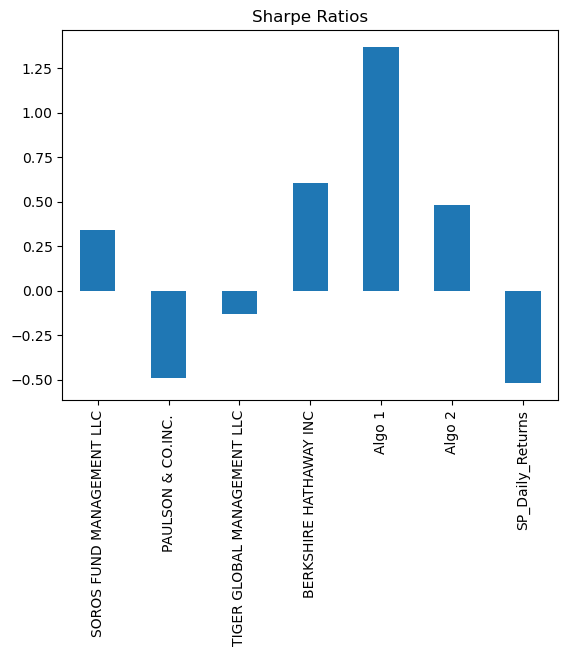

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_annualized.plot.bar(title= 'Sharpe Ratios');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The sharpe ratios shows S&P 500 has a negative sharpe ratio whereas algoritmic strategies,Algo1 and Algo2, have positive sharpe ratios. With Sharpe Ratios we can determine how a portfolio is performing, therefore we can conclude that Algoritmic strategies outperform both the market and Whales portfolios.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this part we have used Google Finance sheet to retrieve daily closing price for Meta, Tesla, and Coca-Cola.
* **`META`**- [Meta Platforms, Inc.](https://en.wikipedia.org/wiki/Meta_Platforms)
* **`TSLA`**- [Tesla, Inc.](https://en.wikipedia.org/wiki/Tesla,_Inc.)
* **`KO`**- [Coca-Cola](https://en.wikipedia.org/wiki/Coca-Cola)

In [30]:
# Reading data from 1st stock
meta_closing_path = Path('Resources/meta_closing.csv')
meta_closing_df = pd.read_csv(meta_closing_path, index_col = 'Date', infer_datetime_format = True, parse_dates=True).sort_index()

meta_closing_df.rename(columns = {'Close': 'Meta Price'}, inplace = True)

meta_closing_df.head()

/var/folders/x9/ddkb4kxd1t5111kw04b1cp3w0000gn/T/ipykernel_58232/2877314727.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  meta_closing_df = pd.read_csv(meta_closing_path, index_col = 'Date', infer_datetime_format = True, parse_dates=True).sort_index()


,Meta Price
Date,
2019-01-02 16:00:00,135.68
2019-01-03 16:00:00,131.74
2019-01-04 16:00:00,137.95
2019-01-07 16:00:00,138.05
2019-01-08 16:00:00,142.53


In [31]:
# Reading data from 2nd stock
tesla_closing_path = Path('Resources/tesla_closing.csv')
tesla_closing_df = pd.read_csv(tesla_closing_path, index_col = 'Date', parse_dates = True)

tesla_closing_df.rename(columns = {'Close': 'Tesla Price'}, inplace = True)

tesla_closing_df.head()

,Tesla Price
Date,
2019-01-02 16:00:00,20.67
2019-01-03 16:00:00,20.02
2019-01-04 16:00:00,21.18
2019-01-07 16:00:00,22.33
2019-01-08 16:00:00,22.36


In [32]:
# Reading data from 3rd stock
coca_closing_path = Path('Resources/coca-cola_closing.csv')
coca_closing_df = pd.read_csv(coca_closing_path, index_col = 'Date', parse_dates = True)

coca_closing_df.rename(columns = {'Close': 'Coca-Cola Price'}, inplace = True)

coca_closing_df.head()

,Coca-Cola Price
Date,
2019-01-02 16:00:00,46.93
2019-01-03 16:00:00,46.64
2019-01-04 16:00:00,47.57
2019-01-07 16:00:00,46.95
2019-01-08 16:00:00,47.48


In [33]:
# Combine all stocks in a single DataFrame
joined_stock = pd.concat((meta_closing_df, tesla_closing_df, coca_closing_df), axis = 'columns', join = 'inner')
joined_stock.head()

,Meta Price,Tesla Price,Coca-Cola Price
Date,,,
2019-01-02 16:00:00,135.68,20.67,46.93
2019-01-03 16:00:00,131.74,20.02,46.64
2019-01-04 16:00:00,137.95,21.18,47.57
2019-01-07 16:00:00,138.05,22.33,46.95
2019-01-08 16:00:00,142.53,22.36,47.48


In [34]:
# Reset Date index
joined_stock.index = pd.to_datetime(joined_stock.index)
joined_stock.index = joined_stock.index.date
joined_stock['Date'] = joined_stock.index
joined_stock = joined_stock.set_index('Date')

joined_stock.head()

,Meta Price,Tesla Price,Coca-Cola Price
Date,,,
2019-01-02,135.68,20.67,46.93
2019-01-03,131.74,20.02,46.64
2019-01-04,137.95,21.18,47.57
2019-01-07,138.05,22.33,46.95
2019-01-08,142.53,22.36,47.48


In [35]:
# Reorganize portfolio data by having a column per symbol

joined_stock.head()

,Meta Price,Tesla Price,Coca-Cola Price
Date,,,
2019-01-02,135.68,20.67,46.93
2019-01-03,131.74,20.02,46.64
2019-01-04,137.95,21.18,47.57
2019-01-07,138.05,22.33,46.95
2019-01-08,142.53,22.36,47.48


In [36]:
# Calculate daily returns
joined_stock_dr = joined_stock.pct_change()
# Drop NAs
joined_stock_dr.dropna(inplace = True)
# Display sample data
display(joined_stock_dr.head())
joined_stock_dr.isnull().sum()

,Meta Price,Tesla Price,Coca-Cola Price
Date,,,
2019-01-03,-0.029039,-0.031447,-0.006179
2019-01-04,0.047138,0.057942,0.019940
2019-01-07,0.000725,0.054297,-0.013033
2019-01-08,0.032452,0.001343,0.011289
2019-01-09,0.011927,0.009392,-0.019166


Meta Price         0
Tesla Price        0
Coca-Cola Price    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
joined_stock_dr = joined_stock_dr.dot(weights)
# Display sample data
joined_stock_dr.head()

Date
2019-01-03   -0.022222
2019-01-04    0.041673
2019-01-07    0.013996
2019-01-08    0.015028
2019-01-09    0.000718
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame

joined_stock_dr.name = 'STOCKS'
join_whale_personal = daily_returns_joined.join(joined_stock_dr)


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_whale_personal.dropna(inplace = True)
join_whale_personal

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Daily_Returns,STOCKS
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.033196,-0.022222
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,-0.006962,0.041673
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,-0.009602,0.013996
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,-0.004081,0.015028
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,-0.004498,0.000718
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.001197
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.006832
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000386


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
join_whale_personal_annualized_std = join_whale_personal.std()*np.sqrt(252)
join_whale_personal_annualized_std

SOROS FUND MANAGEMENT LLC      0.119063
PAULSON & CO.INC.              0.111101
TIGER GLOBAL MANAGEMENT LLC    0.291573
BERKSHIRE HATHAWAY INC         0.204862
Algo 1                         0.091311
Algo 2                         0.121633
SP_Daily_Returns               0.114623
STOCKS                         0.218924
dtype: float64

### Calculate and plot rolling `std` with 21-day window

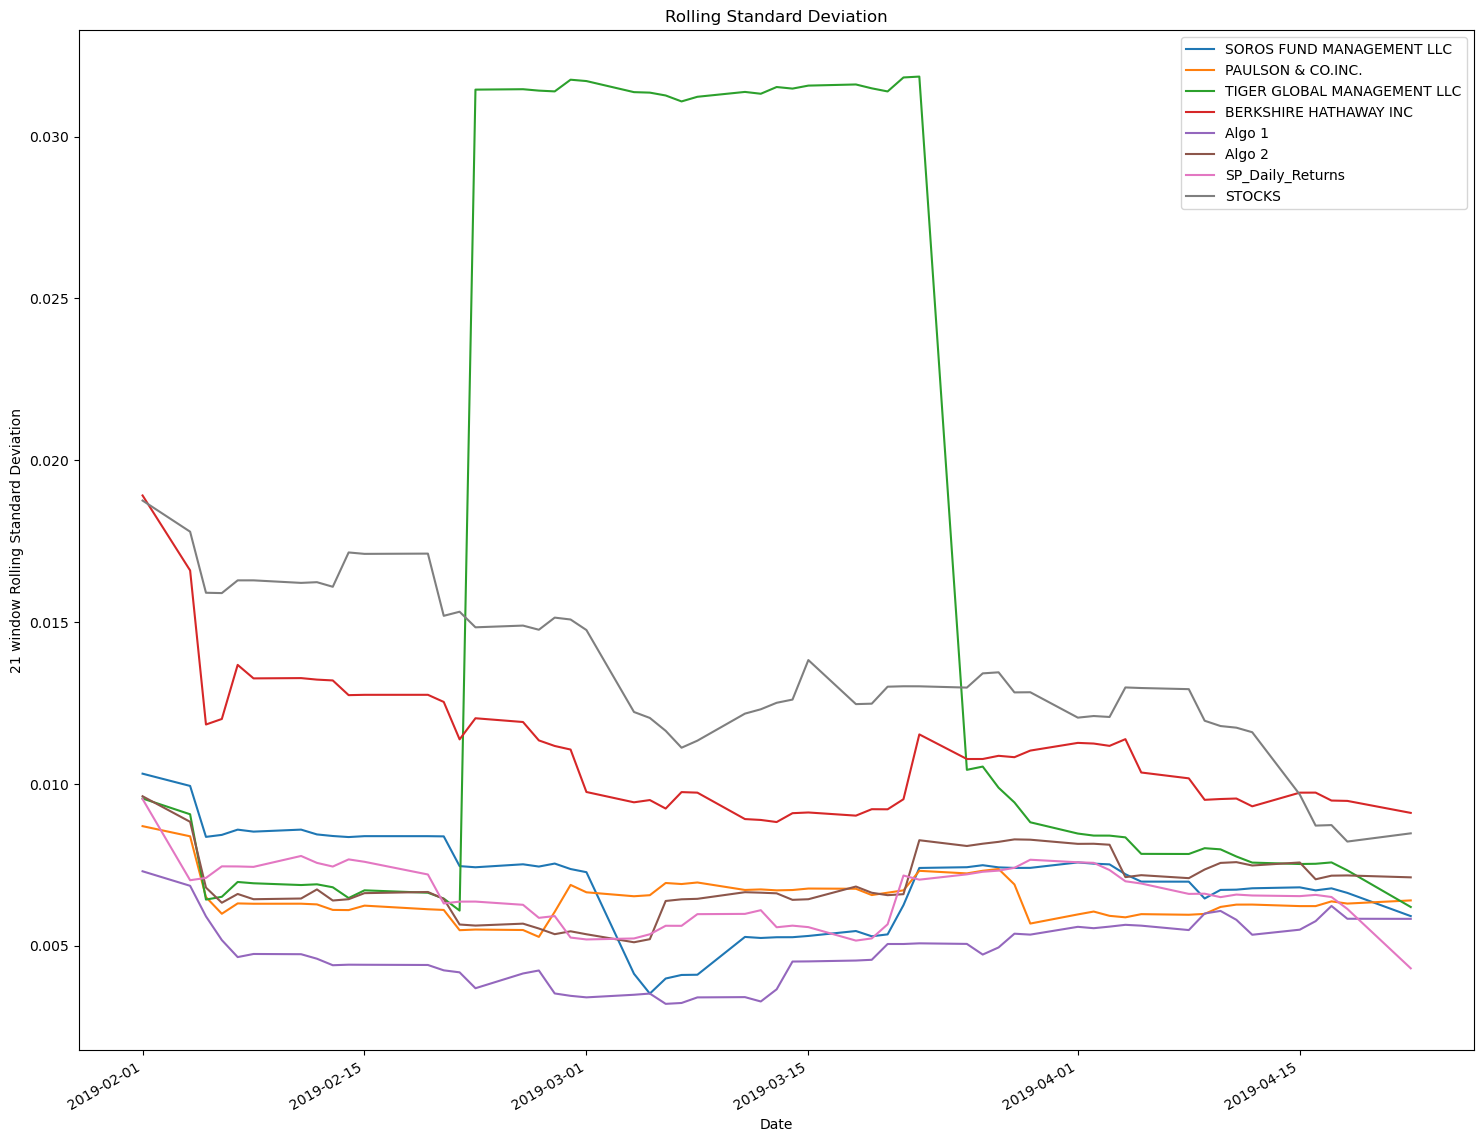

In [46]:
# Calculate rolling standard deviation
join_whale_personal_rolling_std = join_whale_personal.rolling(window = 21).std()

# Plot rolling standard deviation
join_whale_personal_rolling_std.plot(ylabel='21 window Rolling Standard Deviation',figsize = (18,15), title = 'Rolling Standard Deviation');

### Calculate and plot the correlation

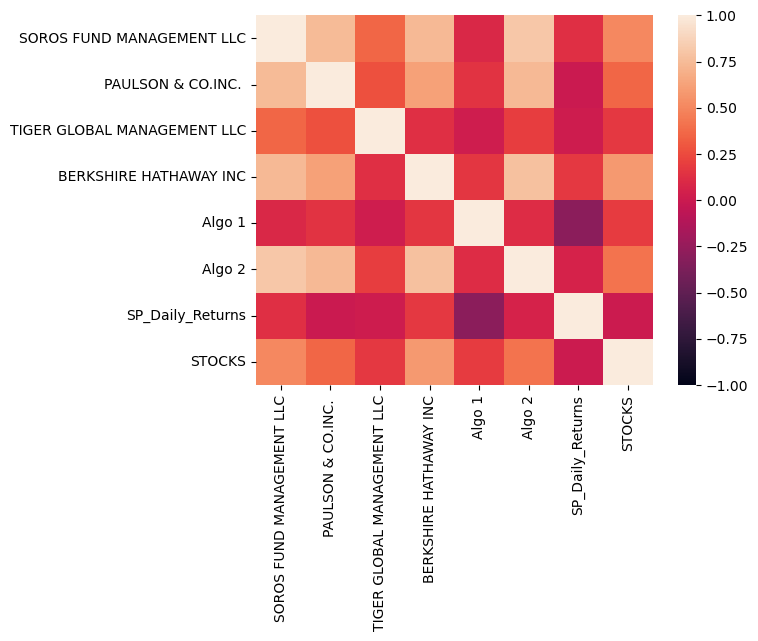

In [42]:
# Calculate and plot the correlation
join_whale_personal_corr = join_whale_personal.corr()
sns.heatmap(join_whale_personal_corr, vmin = -1, vmax = 1);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Stocks covariance: 4.765032359934054e-07
S&P500 variance: 5.213645147041307e-05
Stocks computed beta: 0.009139541003549434


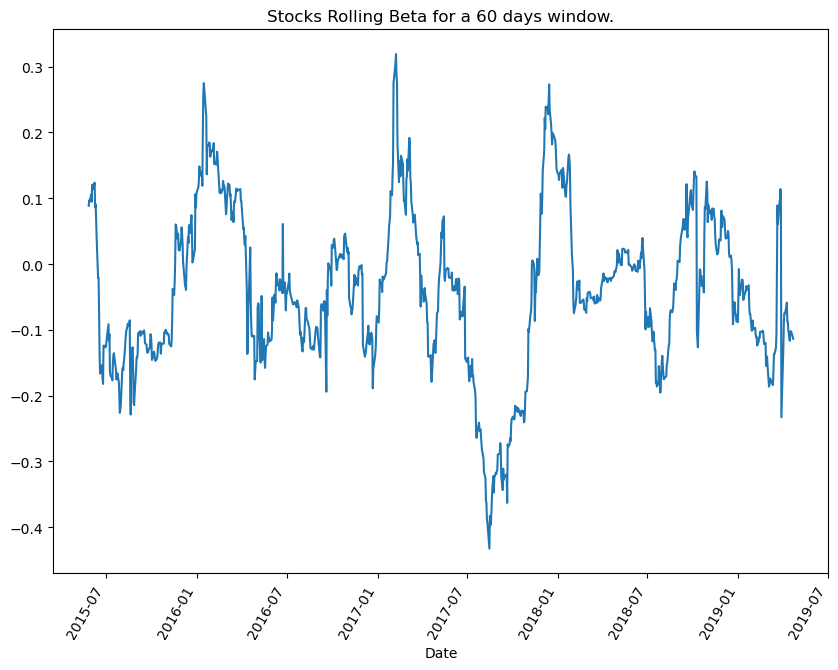

In [43]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance_STOCKS = join_whale_personal['STOCKS'].cov(join_whale_personal['SP_Daily_Returns'])
print(f'Stocks covariance: {covariance_STOCKS}')
# Calculate variance of S&P 500
sp_variance = join_whale_personal['SP_Daily_Returns'].var()
print(f'S&P500 variance: {sp_variance}')
# Computing beta
STOCKS_beta = covariance_STOCKS/sp_variance
print(f'Stocks computed beta: {STOCKS_beta}')
# Plot beta trend
rolling_covariance = join_whale_personal['STOCKS'].rolling(window = 60).cov(join_whale_personal['SP_Daily_Returns'])
rolling_variance = join_whale_personal['SP_Daily_Returns'].rolling(window=60).var()
stocks_rolling = rolling_covariance/rolling_variance
Alga1_rolling.plot(figsize=(10,8), rot = 60, title = 'Stocks Rolling Beta for a 60 days window.');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
join_whale_personal_sharpe_annualized = (join_whale_personal.mean()*252)/(join_whale_personal_annualized_std)
print(f'Annualized Sharpe Ratios :\n\n{join_whale_personal_sharpe_annualized}')

Annualized Sharpe Ratios :

SOROS FUND MANAGEMENT LLC      4.843614
PAULSON & CO.INC.              2.276355
TIGER GLOBAL MANAGEMENT LLC   -0.461606
BERKSHIRE HATHAWAY INC         4.270627
Algo 1                         3.338481
Algo 2                         4.849457
SP_Daily_Returns              -5.243403
STOCKS                         0.981562
dtype: float64


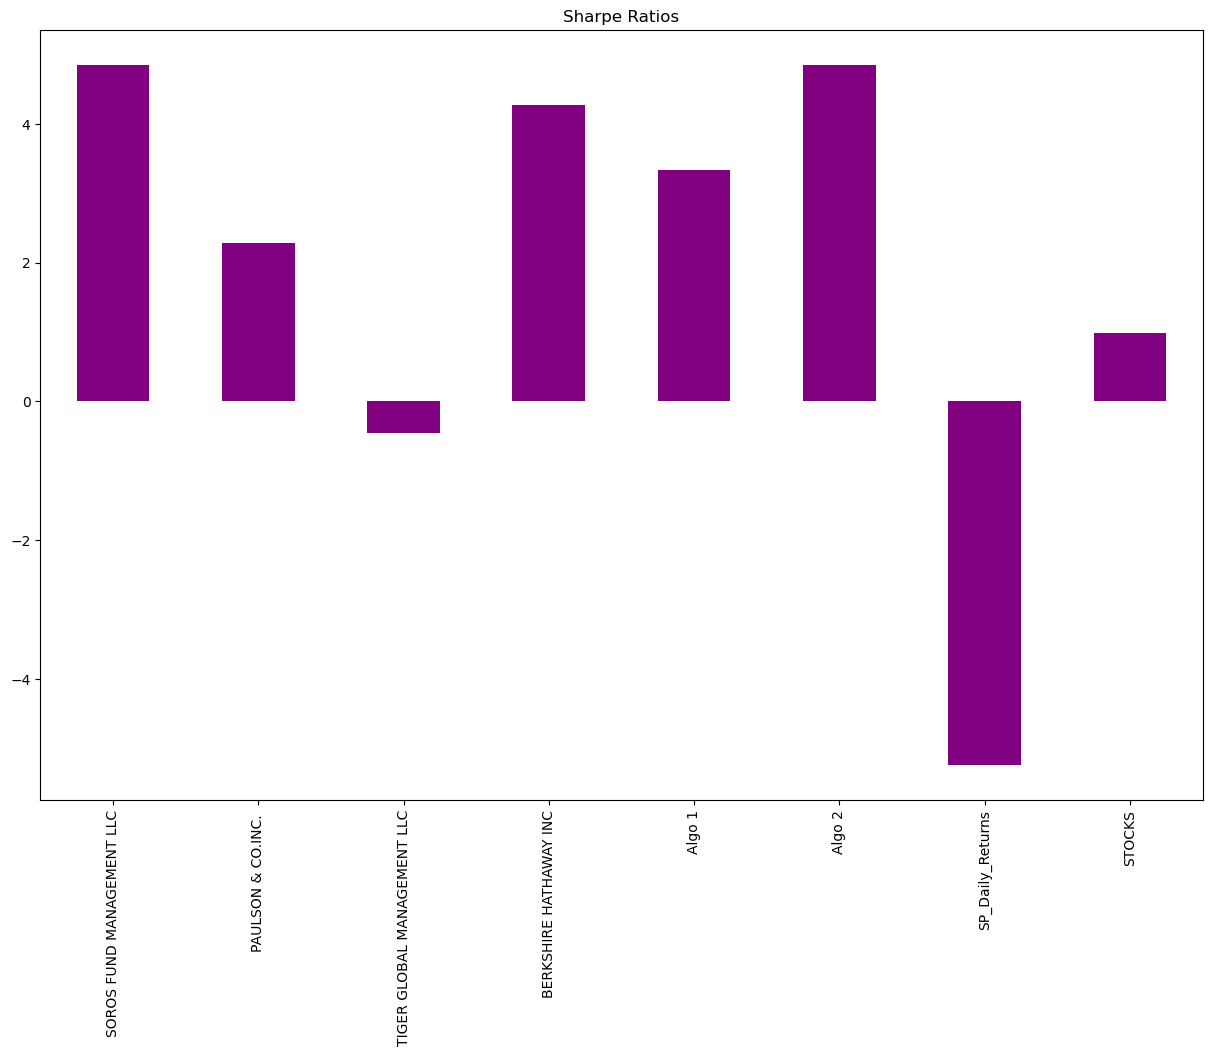

In [48]:
# Visualize the sharpe ratios as a bar plot
join_whale_personal_sharpe_annualized.plot(kind = 'bar', figsize = (15,10), title ='Sharpe Ratios', color = 'purple');

### How does your portfolio do?

**Interpretation of Sharpe Ratio:**

#### Sharpe Ratio > 1:
 Indicates positive risk-adjusted performance, meaning the return exceeds the risk-free rate by more than one standard deviation.
#### Sharpe Ratio > 2: 
Considered a very good risk-adjusted return.
#### Sharpe Ratio < 1: 
Suggests the investment might not be adequately compensating for the level of risk involved. 

*The portfolio I choose is slightly below 1, it may stil be consider as having a positive risk-adjusted performance, but there is a certain level of risk. Considering the companies that are in my portfolio, very good financial health, overall very good market sentiment, I may invest and hold my stocks.* 